# SemEval Exploratory Data Analysis

 What to do?
 
 Sequence Size (max, min, avg)
 
 Term frequency

### SemEval 2017 train and test datasets

In [1]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
semeval_train_path = '/home/rafael/Datasets/semeval/data/clean/train.tsv'
semeval_test_path = '/home/rafael/Datasets/semeval/data/clean/test2017.tsv'

In [57]:
# Loading dataframes
train_df = pd.read_csv(semeval_train_path, 
                          sep="\t",
                          header=None, 
                          names=['target', 'text'],
                          quotechar='"'
                         # encoding='utf-8'
                         )

test_df = pd.read_csv(semeval_test_path, 
                          sep="\t",
                          header=None, 
                          names=['target', 'text'],
                          quotechar='"'
                         # encoding='utf-8'
                         )

# Transforming int labels into strings
train_df['target'] = train_df['target'].map({'positive': 2, 'negative': 0, 'neutral':1})
test_df['target'] = test_df['target'].map({'positive': 2, 'negative': 0, 'neutral':1})

In [58]:
n_train = train_df.shape[0]
print(f"Size of train dataset:{n_train}")

n_test = test_df.shape[0]
print(f"Size of train dataset:{n_test}")

Size of train dataset:50333
Size of train dataset:12284


In [62]:
train_dist = dict()
train_dist['labels'] = ['negative','neutral','positive']
train_dist['count'] = []
train_dist['count'].append(train_df[train_df['target'] == 0].shape[0] / train_df.shape[0])
train_dist['count'].append(train_df[train_df['target'] == 1].shape[0] / train_df.shape[0])
train_dist['count'].append(train_df[train_df['target'] == 2].shape[0] / train_df.shape[0])

In [63]:
train_dist

{'labels': ['negative', 'neutral', 'positive'],
 'count': [0.15576262094450957, 0.44883078695885403, 0.3954065920966364]}

<AxesSubplot:title={'center':'Percentage of Tweets per sentiment category in SemEval Training dataset'}, xlabel='Sentiment category', ylabel='Percentage'>

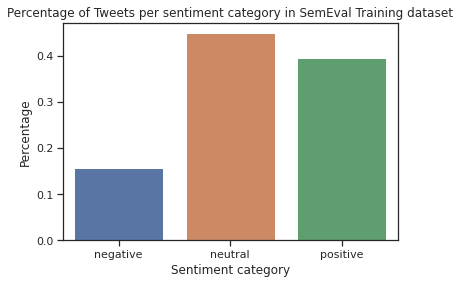

In [65]:
plt.title('Percentage of Tweets per sentiment category in SemEval Training dataset')
plt.xlabel('Sentiment category')
plt.ylabel('Percentage')
sns.barplot(x=train_dist['labels'], y=train_dist['count'])

In [66]:
test_dist = dict()
test_dist['labels'] = ['negative','neutral','positive']
test_dist['count'] = []
test_dist['count'].append(test_df[test_df['target'] == 0].shape[0] / test_df.shape[0])
test_dist['count'].append(test_df[test_df['target'] == 1].shape[0] / test_df.shape[0])
test_dist['count'].append(test_df[test_df['target'] == 2].shape[0] / test_df.shape[0])

<AxesSubplot:title={'center':'Percentage of Tweets per sentiment category in SemEval testing dataset'}, xlabel='Sentiment category', ylabel='Percentage'>

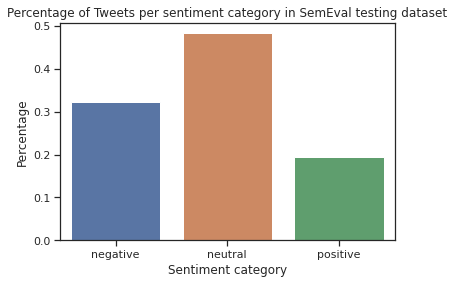

In [67]:
plt.title('Percentage of Tweets per sentiment category in SemEval testing dataset')
plt.xlabel('Sentiment category')
plt.ylabel('Percentage')
sns.barplot(x=test_dist['labels'], y=test_dist['count'])

In [5]:
train_tweets = train_df['text']
test_tweets = test_df['text']

In [6]:
#Tokenizing tweets and lower

def tokenize_text(text):
    terms = []
    for sentence in text:
        terms.append(word_tokenize(sentence))
    return terms

train_text_tokenized = tokenize_text(train_tweets)
test_text_tokenized = tokenize_text(test_tweets)

In [7]:
# counting max tokens in sentence

from statistics import mean

def tokens_stats(tokenized_list):
    size_list = []
    for tokens in tokenized_list:
        size_list.append(len(tokens))
    return max(size_list), min(size_list), mean(size_list)

print(f"Tokens stats for training dataset: \n\
      -> max:{tokens_stats(train_text_tokenized)[0]} \n\
      -> min:{tokens_stats(train_text_tokenized)[1]} \n\
      -> mean:{tokens_stats(train_text_tokenized)[2]} \n ")

print(f"Tokens stats for test dataset: \n\
        -> max:{tokens_stats(test_text_tokenized)[0]} \n\
        -> min:{tokens_stats(test_text_tokenized)[1]} \n\
        -> mean:{tokens_stats(test_text_tokenized)[2]} \n ")

Tokens stats for training dataset: 
      -> max:110 
      -> min:1 
      -> mean:22.566924284266783 
 
Tokens stats for test dataset: 
        -> max:42 
        -> min:1 
        -> mean:17.951155975252362 
 


In [8]:
#removing stopwords and punctuation

def remove_stopwords_punctuation(text):
    terms = []
    for tokens in text:
        #remove stopwords
        filtered_sentence = [w for w in tokens if not w.lower() in stop_words]
        #remove punctuation
        filtered_sentence = [word for word in filtered_sentence if word.isalnum()]
        terms.append(filtered_sentence)
    return terms

train_no_swp = remove_stopwords_punctuation(train_text_tokenized)
test_no_swp = remove_stopwords_punctuation(test_text_tokenized)

In [9]:
# counting word frequency
def count_frequency(terms_list):
    frequency = dict()
    for terms in terms_list:
        terms_lower = [term.lower() for term in terms]
        for term in terms_lower:
            if term in frequency:
                frequency[term] += 1
            else:
                frequency[term] = 1
    return dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[1:21])

# def count_idf(terms_list):
#     df = dict()
#     idf = dict()
#     N = len(terms_list)
#     for terms in terms_list:
#         #lower terms
#         terms_lower = [term.lower for term in terms]
#         #remove dups
#         terms_no_dup_lower = list(dict.fromkeys(terms_lower))
#         #count idf
#         for term in terms_no_dup_lower:
#             if term in df:
#                 df[term] += 1
#             else:
#                 df[term] = 1
#     for term, df in df.items():
#         idf[term] = math.log10(N / (float(df) + 1))
#     return idf

# import math
# def tf_idf(terms_list):
#     tf_idf_dict = dict()
#     tf = count_frequency(terms_list)
#     idf = count_idf(terms_list)
#     for term in tf.keys():
#         tf_idf_dict[term] = tf[term] * idf[term]
#     return dict(sorted(tf_idf_dict.items(), key=lambda item: item[1], reverse=True)[1:21])
    

train_top_20_terms = count_frequency(train_no_swp)
test_top_20_terms = count_frequency(test_no_swp)

# train_top_20_terms = tf_idf(train_no_swp)
# test_top_20_terms = tf_idf(test_no_swp)

In [92]:
#train_top_20_terms=dict(sorted(train_term_frequency.items(), key=lambda item: item[1], reverse=True)[1:21])
#test_top_20_terms = dict(sorted(test_term_frequency.items(), key=lambda item: item[1], reverse=True)[1:21])

In [10]:
train_top_20_terms

{'tomorrow': 7848,
 'may': 7384,
 'day': 4165,
 'going': 3313,
 'night': 3214,
 'see': 3099,
 'friday': 2957,
 '1st': 2851,
 'sunday': 2828,
 'like': 2731,
 'time': 2620,
 'get': 2474,
 'saturday': 2242,
 'one': 2146,
 'go': 2137,
 '2nd': 2043,
 'new': 2010,
 'monday': 1872,
 'game': 1853,
 'today': 1649}

<AxesSubplot:title={'center':'Term frequency SemEval 2017 Task4-A Training Dataset'}, xlabel='Frequency'>

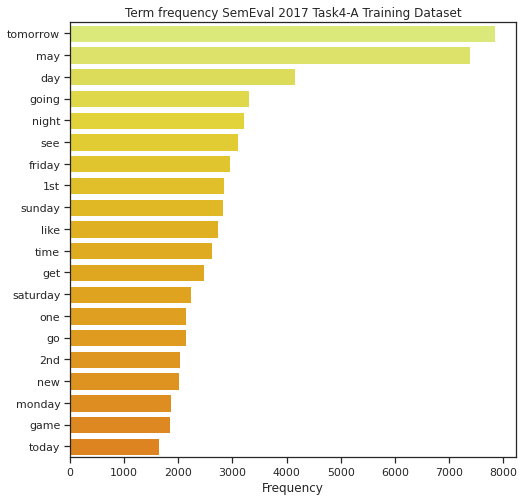

In [32]:
data_on_train = {
    'terms': list(train_top_20_terms.keys()),
    'frequency':list(train_top_20_terms.values())
}
plt.figure(figsize=(8,8))
plt.title('Term frequency SemEval 2017 Task4-A Training Dataset')
plt.xlabel('Frequency')
sns.barplot(x='frequency',y='terms', data=data_on_train, palette="Wistia")

In [12]:
test_top_20_terms

{'trump': 1087,
 'like': 487,
 'via': 387,
 'people': 371,
 'get': 362,
 'one': 331,
 'new': 302,
 'us': 301,
 'obama': 288,
 'would': 286,
 'white': 243,
 '2': 234,
 'know': 231,
 'vote': 227,
 'time': 223,
 'think': 210,
 'news': 209,
 'love': 207,
 'see': 204,
 'voter': 202}

<AxesSubplot:title={'center':'Term frequency SemEval 2017 Task4-A Testing Dataset'}, xlabel='Frequency'>

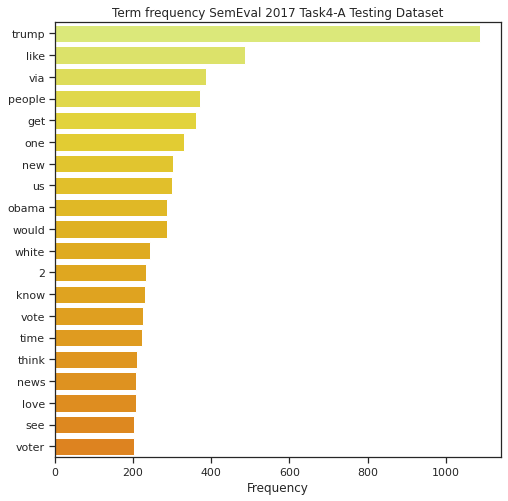

In [33]:
data_on_test = {
    'terms': list(test_top_20_terms.keys()),
    'frequency':list(test_top_20_terms.values())
}
plt.figure(figsize=(8,8))
plt.title('Term frequency SemEval 2017 Task4-A Testing Dataset')
plt.xlabel('Frequency')
sns.barplot(x='frequency',y='terms', data=data_on_test, palette="Wistia")

## Word frequency in training data by label

### Negative

In [14]:
negative_tweets = train_df[train_df['target'] == 0]
negative_tweets_text = negative_tweets['text']

negative_text_tokenized = tokenize_text(negative_tweets_text)
negative_text_no_swp = remove_stopwords_punctuation(negative_text_tokenized)
negative_term_frequency = count_frequency(negative_text_no_swp)
negative_term_frequency

{'may': 1711,
 'tomorrow': 992,
 'like': 649,
 '1st': 545,
 'day': 487,
 'going': 475,
 'get': 404,
 'time': 374,
 'sunday': 353,
 'one': 337,
 'see': 332,
 '2nd': 326,
 'go': 319,
 'night': 310,
 'friday': 308,
 '3rd': 297,
 'think': 291,
 'still': 285,
 'want': 284,
 'know': 260}

### neutral

In [15]:
neutral_tweets = train_df[train_df['target'] == 1]
neutral_tweets_text = neutral_tweets['text']

neutral_text_tokenized = tokenize_text(neutral_tweets_text)
neutral_text_no_swp = remove_stopwords_punctuation(neutral_text_tokenized)
neutral_term_frequency = count_frequency(neutral_text_no_swp)
neutral_term_frequency

{'may': 3189,
 'tomorrow': 3086,
 'going': 1436,
 'day': 1378,
 'night': 1351,
 'sunday': 1279,
 'friday': 1261,
 '1st': 1239,
 'time': 1112,
 'like': 1083,
 'get': 1056,
 'see': 1029,
 'saturday': 1009,
 'new': 992,
 '2nd': 911,
 'game': 905,
 'go': 889,
 'one': 875,
 'monday': 861,
 '3rd': 780}

### positive

In [16]:
positive_tweets = train_df[train_df['target'] == 2]
positive_tweets_text = positive_tweets['text']

positive_text_tokenized = tokenize_text(positive_tweets_text)
positive_text_no_swp = remove_stopwords_punctuation(positive_text_tokenized)
positive_term_frequency = count_frequency(positive_text_no_swp)
positive_term_frequency

{'tomorrow': 3770,
 'may': 2484,
 'day': 2300,
 'see': 1738,
 'night': 1553,
 'going': 1402,
 'friday': 1388,
 'good': 1235,
 'sunday': 1196,
 'time': 1134,
 '1st': 1067,
 'love': 1045,
 'get': 1014,
 'saturday': 1002,
 'like': 999,
 'one': 934,
 'go': 929,
 'best': 908,
 'new': 859,
 'happy': 827}

In [17]:
data = {
    'term':list(negative_term_frequency.keys()),
    'frequency':list(negative_term_frequency.values())
}
negative_df = pd.DataFrame.from_dict(data)
negative_df['label'] = ['negative']*20

data = {
    'term':list(neutral_term_frequency.keys()),
    'frequency':list(neutral_term_frequency.values())
}
neutral_df = pd.DataFrame.from_dict(data)
neutral_df['label'] = ['neutral']*20

data = {
    'term':list(positive_term_frequency.keys()),
    'frequency':list(positive_term_frequency.values())
}
positive_df = pd.DataFrame.from_dict(data)
positive_df['label'] = ['positive']*20

frames = [negative_df, neutral_df, positive_df]

train_term_frequency_data = pd.concat(frames)

Text(0, 0.5, '')

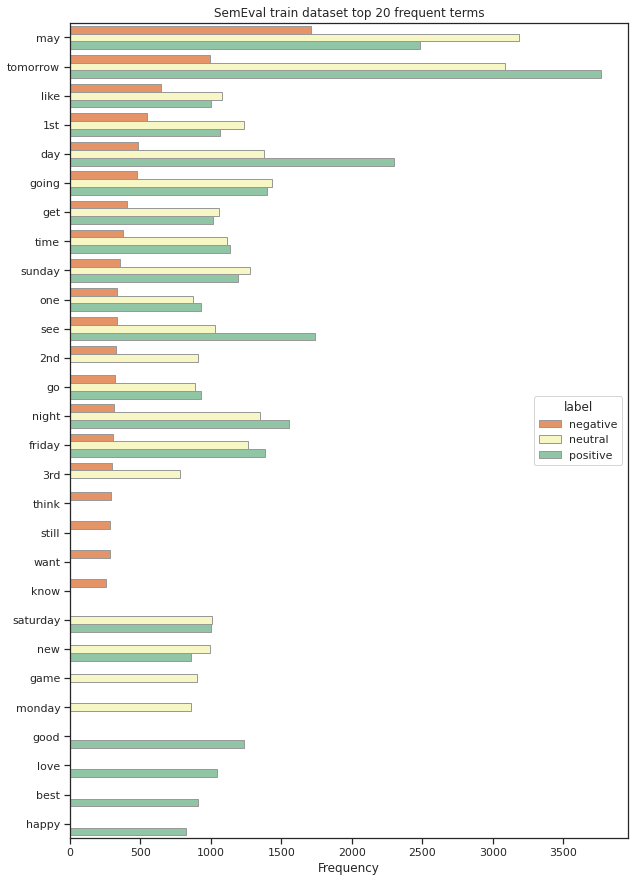

In [23]:
f = plt.figure(figsize=(10, 15))

plt.title('SemEval train dataset top 20 frequent terms')
sns.barplot(x="frequency" ,y="term", hue="label",
            palette="Spectral", edgecolor=".6",
            data=train_term_frequency_data)
plt.xlabel('Frequency')
plt.ylabel('')

## Word frequency in test tweets by label

### Negative

In [25]:
negative_tweets_test = test_df[test_df['target'] == 0]
negative_tweets_text_test = negative_tweets_test['text']

negative_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(negative_tweets_text_test)))
negative_term_frequency_test

{'trump': 550,
 'people': 215,
 'like': 203,
 'white': 163,
 'obama': 161,
 'get': 159,
 'us': 125,
 'would': 118,
 'liberals': 117,
 'one': 115,
 'nazi': 106,
 'bad': 101,
 'melania': 98,
 'clinton': 95,
 'kim': 93,
 'know': 89,
 'vote': 89,
 'leftists': 88,
 'supremacists': 86,
 'think': 84}

### Neutral

In [26]:
neutral_tweets_test = test_df[test_df['target'] == 1]
neutral_tweets_text_test = neutral_tweets_test['text']

neutral_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(neutral_tweets_text_test)))
neutral_term_frequency_test

{'trump': 478,
 'via': 247,
 'like': 181,
 'new': 181,
 'get': 150,
 'us': 129,
 'one': 125,
 '2': 125,
 'people': 121,
 'vote': 119,
 'voter': 118,
 'isis': 116,
 'would': 112,
 'news': 106,
 'time': 105,
 '5': 103,
 'obama': 101,
 'know': 100,
 'read': 97,
 'israel': 93}

### positive

In [27]:
positive_tweets_test = test_df[test_df['target'] == 2]
positive_tweets_text = positive_tweets_test['text']

positive_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(positive_tweets_text)))
positive_term_frequency_test

{'love': 152,
 'thanksgiving': 104,
 'like': 103,
 'good': 102,
 'great': 92,
 'one': 91,
 'fantasticbeasts': 75,
 'day': 74,
 'best': 74,
 'happy': 68,
 'video': 67,
 'see': 66,
 'thankyouobama': 65,
 'new': 64,
 'thisisus': 64,
 'via': 61,
 'trump': 59,
 'vr': 59,
 'beautyandthebeast': 58,
 'time': 57}

In [28]:
data = {
    'term':list(negative_term_frequency_test.keys()),
    'frequency':list(negative_term_frequency_test.values())
}
negative_df_test = pd.DataFrame.from_dict(data)
negative_df_test['label'] = ['negative']*20

data = {
    'term':list(neutral_term_frequency_test.keys()),
    'frequency':list(neutral_term_frequency_test.values())
}
neutral_df_test = pd.DataFrame.from_dict(data)
neutral_df_test['label'] = ['neutral']*20

data = {
    'term':list(positive_term_frequency_test.keys()),
    'frequency':list(positive_term_frequency_test.values())
}
positive_df_test = pd.DataFrame.from_dict(data)
positive_df_test['label'] = ['positive']*20

frames = [negative_df_test, neutral_df_test, positive_df_test]

train_term_frequency_data_test = pd.concat(frames)

Text(0, 0.5, '')

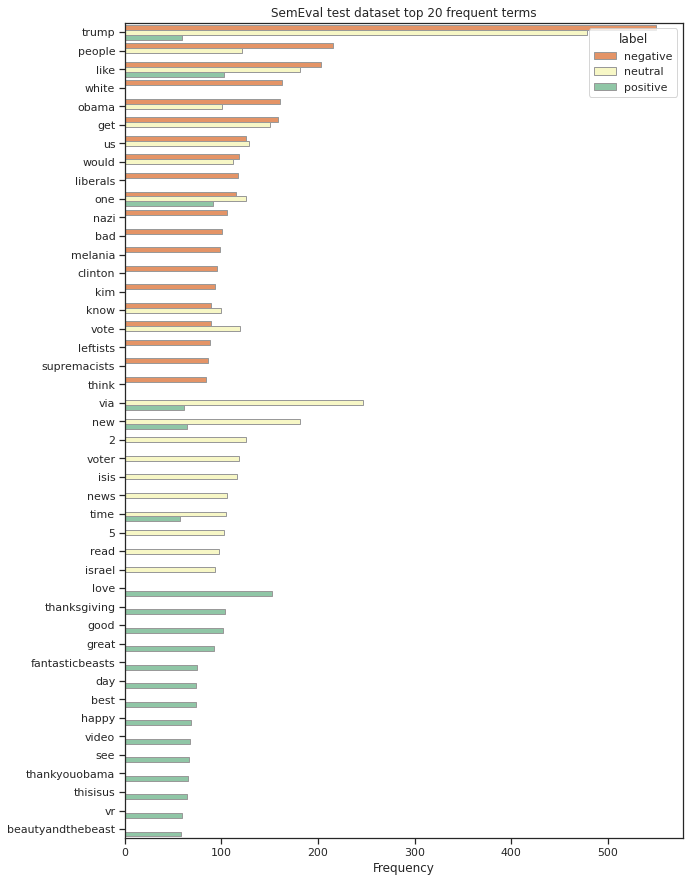

In [29]:
ax = plt.figure(figsize=(10, 15))

plt.title('SemEval test dataset top 20 frequent terms')
sns.barplot(x="frequency" ,y="term", hue="label",
            palette="Spectral", edgecolor=".6",
            data=train_term_frequency_data_test)
plt.xlabel('Frequency')
plt.ylabel('')

 Correlate predicted sentiment labels with gold sentiment labels